In [12]:
import pandas as pd
import joblib
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

test_data =  "..\data\Test_data_disease.csv"
df_test = pd.read_csv(test_data)

X,y = df_test.drop("cardio", axis = "columns"), df_test["cardio"]

model = joblib.load("voting_clf_model.pkl")
 


In [13]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(criterion='entropy',
                                                                      max_features='log2',
                                                                      n_estimators=150)),
                                              ('lr',
                                               LogisticRegression(C=0.026366508987303583,
                                                                  penalty='l1',
                                                                  solver='saga')),
                                              ('bn', BernoulliNB(alpha=10))],
                                  voting='soft'))])

In [14]:
X

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,female,male
0,45072,49.84,120,80,1,1,0,0,1,31.20,1,0
1,87510,39.33,120,70,1,1,0,0,1,21.83,1,0
2,10492,43.96,140,90,1,1,0,0,0,26.79,0,1
3,7808,46.17,120,80,1,1,0,0,1,39.26,1,0
4,72009,53.78,120,80,1,1,0,0,1,24.90,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,73213,53.98,120,80,1,1,0,0,1,23.77,0,1
96,17978,51.20,120,80,1,1,0,0,1,21.23,1,0
97,25580,61.66,140,90,1,1,0,0,1,32.41,1,0
98,96457,55.81,120,80,1,1,0,0,1,30.93,1,0


In [15]:
y.value_counts()

0    63
1    37
Name: cardio, dtype: int64

In [16]:
y_pred = model.predict(X)

In [17]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [18]:
proba = model.predict_proba(X)

proba_class_0 = proba[:,0]
proba_class_1 = proba[:,1]

In [19]:
proba

array([[0.79047664, 0.20952336],
       [0.84455918, 0.15544082],
       [0.24662008, 0.75337992],
       [0.75235145, 0.24764855],
       [0.74532702, 0.25467298],
       [0.12173222, 0.87826778],
       [0.18857838, 0.81142162],
       [0.50107063, 0.49892937],
       [0.68144574, 0.31855426],
       [0.75332277, 0.24667723],
       [0.85154004, 0.14845996],
       [0.19721027, 0.80278973],
       [0.7015911 , 0.2984089 ],
       [0.08157722, 0.91842278],
       [0.72746652, 0.27253348],
       [0.91625539, 0.08374461],
       [0.6902381 , 0.3097619 ],
       [0.63579456, 0.36420544],
       [0.74357673, 0.25642327],
       [0.55380819, 0.44619181],
       [0.14313271, 0.85686729],
       [0.81435072, 0.18564928],
       [0.40160344, 0.59839656],
       [0.10595699, 0.89404301],
       [0.18069727, 0.81930273],
       [0.14556697, 0.85443303],
       [0.12214474, 0.87785526],
       [0.1088178 , 0.8911822 ],
       [0.87944971, 0.12055029],
       [0.72431208, 0.27568792],
       [0.

In [20]:
data = {"probability class 0" : proba_class_0,
        "probability class 1" : proba_class_1,
        "prediction" : y_pred}

df_predictions = pd.DataFrame(data)

Accuracy score:  0.76
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        57
           1       0.76      0.65      0.70        43

    accuracy                           0.76       100
   macro avg       0.76      0.75      0.75       100
weighted avg       0.76      0.76      0.76       100



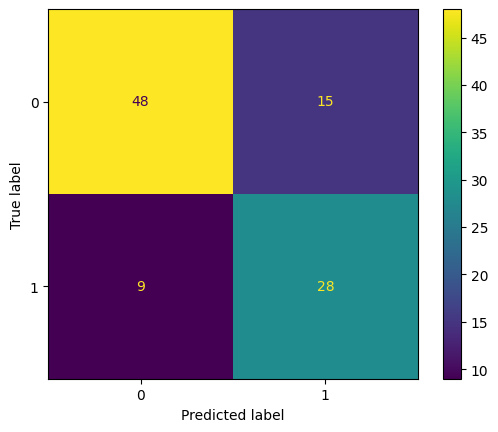

In [21]:
print(f"Accuracy score:  {model.score(X,y)}" )
print(classification_report(y_pred, y))
cm = confusion_matrix(y, y_pred)
ConfusionMatrixDisplay(cm).plot();

In [22]:
df_predictions.head()

,probability class 0,probability class 1,prediction
0,0.790477,0.209523,0
1,0.844559,0.155441,0
2,0.246620,0.753380,1
3,0.752351,0.247649,0
4,0.745327,0.254673,0
